In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [141]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [142]:
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
ID        107833 non-null object
DATOP     107833 non-null object
FLTID     107833 non-null object
DEPSTN    107833 non-null object
ARRSTN    107833 non-null object
STD       107833 non-null object
STA       107833 non-null object
STATUS    107833 non-null object
AC        107833 non-null object
target    107833 non-null float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [144]:
def points(row):
    return row.replace("." , ":")

In [145]:
train.STA = train.STA.apply(points)
test.STA = test.STA.apply(points)

In [146]:
train.DATOP = train.DATOP.replace("." , ":")
train.STD = train.STD.replace("." , ":")
train.STA = train.STA.replace("." , ":")

In [147]:
test.STA = test.STA.replace("." , ":")

In [148]:
test.DATOP = pd.to_datetime(test.DATOP)
test.STD = pd.to_datetime(test.STD)
test.STA = pd.to_datetime(test.STA)

train.DATOP = pd.to_datetime(train.DATOP)
train.STD = pd.to_datetime(train.STD)
train.STA = pd.to_datetime(train.STA)

In [149]:
train['day'] = train.DATOP.dt.day
train['month'] = train.DATOP.dt.month
train['year'] = train.DATOP.dt.year

test['day'] = test.DATOP.dt.day
test['month'] = test.DATOP.dt.month
test['year'] = test.DATOP.dt.year

In [150]:
test['sta_hour'] = test.STA.dt.hour
test['sta_minute'] = test.STA.dt.minute

train['sta_hour'] = train.STA.dt.hour
train['sta_minute'] = train.STA.dt.minute

test['std_hour'] = test.STD.dt.hour
test['std_minute'] = test.STD.dt.minute

train['std_hour'] = train.STD.dt.hour
train['std_minute'] = train.STD.dt.minute

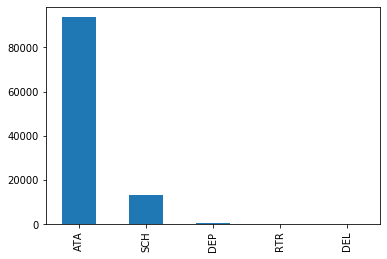

In [154]:
train.STATUS.value_counts().plot(kind = 'bar')

In [155]:
train.STATUS = np.where(train.STATUS == "ATA" , 1, 0)
test.STATUS = np.where(test.STATUS == "ATA" , 1, 0)

In [156]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,day,month,year,sta_hour,sta_minute,std_hour,std_minute
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,1,TU 32AIMN,260.0,3,1,2016,12,55,10,30
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,1,TU 31BIMO,20.0,13,1,2016,16,55,15,5
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,1,TU 32AIMN,0.0,16,1,2016,6,45,4,10
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,1,TU 736IOK,0.0,17,1,2016,17,0,14,10
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,1,TU 320IMU,22.0,17,1,2016,15,50,14,30


In [125]:
['TUN', 'DJE', 'ORY', 'MIR', 'MRS', 'LYS', 'NCE', 'ALG', 'MXP', 'IST']

True

In [157]:
def city_other(row):
    if row not in ['TUN', 'DJE', 'ORY', 'MIR', 'MRS', 'LYS', 'NCE', 'ALG', 'MXP', 'IST']:
        return "Other"
    else:
        return row

In [158]:
test.DEPSTN = test.DEPSTN.apply(city_other)
train.DEPSTN = train.DEPSTN.apply(city_other)
test.ARRSTN = test.ARRSTN.apply(city_other)
train.ARRSTN = train.ARRSTN.apply(city_other)

In [159]:
test.DEPSTN.value_counts()

TUN      3621
Other    2681
DJE       926
ORY       574
MIR       522
MRS       243
NCE       192
LYS       191
ALG       129
MXP       129
IST       125
Name: DEPSTN, dtype: int64

In [160]:
trainset = train.drop(['ID' , 'DATOP' , 'FLTID' , 'STD' , 'STA'] , axis = 1)
testset = test.drop(['ID' , 'DATOP' , 'FLTID' , 'STD' , 'STA'] , axis = 1)

In [161]:
all_ = pd.concat([trainset.drop(['target'], axis = 1), testset])

In [162]:
all_data = pd.get_dummies(all_)

In [163]:
Xt = all_data.iloc[:trainset.shape[0],:]
Xts = all_data.iloc[trainset.shape[0]:,:]

In [164]:
Xts.head()

,STATUS,day,month,year,sta_hour,sta_minute,std_hour,std_minute,DEPSTN_ALG,DEPSTN_DJE,...,AC_TU CR9XXX,AC_UG AT7AT7,AC_UG AT7LBD,AC_UG AT7LBE,AC_UG AT7XXX,AC_UG CR9CR9,AC_UG CR9ISA,AC_UG CR9XXX,AC_UJ 320TCF,AC_X9 320VEB
0,1,4,5,2016,7,30,6,40,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,5,5,2016,20,5,15,20,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6,5,2016,12,25,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,11,5,2016,13,10,9,40,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,11,5,2016,12,35,9,50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
dataset = train.drop(['ID' , 'DATOP' , 'FLTID' , 'STD' , 'STA' , 'AC'] , axis = 1)

In [74]:
testset = test.drop(['ID' , 'DATOP' , 'FLTID' , 'STD' , 'STA' , 'AC'] , axis = 1)

In [165]:
X = Xt.copy()
y = trainset.target

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xt,y , test_size = 0.3 , random_state = 70)

In [167]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

119.79385721278899

In [108]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

C:\Users\MxcsYounes\.conda\envs\base_ml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [109]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

125.33770960272689

In [171]:
from xgboost import XGBRegressor
reg = XGBRegressor(objective = 'reg:squarederror')
reg.fit(x_train, y_train)

C:\Users\MxcsYounes\.conda\envs\base_ml\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [172]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

118.49051186779668

In [169]:
from lightgbm import LGBMRegressor
reg = LGBMRegressor()
reg.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [170]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_pred , y_test))

115.7395893002875

In [112]:
result = reg.predict(Xts)

In [113]:
orders = test.ID
all_data = list(zip(orders, result.reshape(1,-1)[0].astype('float32')))

In [114]:
final_result = pd.DataFrame(all_data, columns=['ID', 'target'])
final_result.head()

,ID,target
0,test_id_0,20.037004
1,test_id_1,37.838703
2,test_id_2,27.317987
3,test_id_3,15.358325
4,test_id_4,29.310005


In [115]:
final_result.to_csv('first_tunis_air_3_lgbm_2.csv' , index = False)